<div class="alert alert-block alert-success">
    
# **FIT5196 Task 1 - Assessment 1**
#### Student Name: Alexandra Goh & Sothearith Tith
#### Student ID: 29796431 & 27208001

Date: 19th April 2024


Environment: Python 3.10.12

Libraries used:
* re (for regular expression, installed and imported)
* json (for serialization of Python data structures into JSON format, installed and imported)
    
</div>

<div class="alert alert-block alert-info">

## **Table of Contents**

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data](#examine) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Reading Files](#Read) <br>
$\;\;\;\;$[4.2. Standardizing Party Names and Country Identifiers](#Reg_Exp) <br>
$\;\;\;\;\;$[4.2.1. Removal of Titles for Individuals](#Title_Removal) <br>
$\;\;\;\;\;$[4.2.2. States Definition](#states) <br>
$\;\;\;\;$[4.3. Processing Trademark Assignment Data](#process) <br>
$\;\;\;\;\;$[4.3.1. Extraction of Assignor & Assignee Information](#assignors_assignees) <br>
$\;\;\;\;\;$[4.3.2. Extraction of Unique IDs & Remaining Assignment Entry Info](#unique_id) <br>
$\;\;\;\;\;$[4.3.3. Application to Input File](#apply) <br>
[5. Writing to JSON File](#write) <br>
$\;\;\;\;$[5.1. Saving Extracted Data to JSON File](#save) <br>
$\;\;\;\;$[5.2. Verification - using the sample files](#test_xml) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>
[8. Appendix](#appendix) <br>
$\;\;\;\;$[8.1. Counting Extracted Assignment Entries](#count) <br>
$\;\;\;\;$[8.2. Extracting Unique Countries (Assignors)](#assignor_countries) <br>
$\;\;\;\;$[8.3. Extracting Unique Countries (Assignees)](#assignee_countries) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## **1.  Introduction**  <a class="anchor" name="Intro"></a>
    
</div>



This report presents the findings of a data wrangling task focused on parsing raw text files and analyzing textual data to extract and transform semi-structured text data into a structured format. Specifically, the task involves processing a subset of records related to trademark assignments stored in a single `.txt` file.

<br>

The primary objective of this assessment is to extract relevant information from the trademark assignment records and organize it into a structured format, adhering to a predefined set of elements specified in the assignment brief. Each trademark assignment record contains various attributes such as reel number, frame number, assignors, assignees, and additional metadata. Through techniques such as parsing raw text files, regular expression pattern matching, and text parsing, the extracted data will be transformed into JSON format, facilitating further analysis and exploration of the dataset.

-------------------------------------

<div class="alert alert-block alert-warning">
    
## **2.  Importing Libraries**  <a class="anchor" name="libs"></a>
 </div>

The packages imported for this assessment serve specific tasks as follows:
* **re:** to define and apply regular expressions, enabling the parsing and manipulation of textual data.
* **json:** to facilitate the transformation of extracted data into JSON format.

In [17]:
import re
import json

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The python version used is as below:

In [19]:
!python --version

Python 3.10.12


-------------------------------------

<div class="alert alert-block alert-warning">

## **3.  Examining Raw Data** <a class="anchor" name="examine"></a>

 </div>

We begin by closely inspecting the content of the raw data file. Through this examination, several patterns and observations were identified, providing additional insights on the nature and characteristics of the dataset. Below are the key findings:

**Identification of Data Patterns:**
* The `<last-update-date>` records span a considerable time period, ranging from approximately the early 1990s to 2023.
* The `<date-recorded>` records predominantly cover the period from the early 1990s to 2023, with a few exceptions dating back even earlier (e.g., records from 1955, 1963, 1977, 1980, etc.).
* The presence of `&amp;` in XML, representing the character "&," is noted throughout the dataset.
* Special characters, such as accented letters like "SOCIÉTÉ," are observed within the `<person-or-organization-name>` field.
* Some organization names conclude with designations like S.A. and S.A.S., signifying various types of corporations which are commonly found in several countries in Latin America.

**Consistency in Date Format:**
* All dates within the dataset adhere to the format "YYYYMMDD," formatted with no spaces in between.

**Variations in Country/Nationality Labeling:**
* Instances are noted where USA states are labeled under the `<nationality>` attribute, while records from other countries such as Canada, China, Germany, and Israel are also identified under the "nationality" label.

**Geographical Attributes (for states):**
* The majority of `<state>` attributes seem to correspond to USA states, indicating a predominant focus on trademark assignments within the United States.
* The dataset also encompasses records from Canadian states, as well as British overseas territories and Crown dependencies.

-------------------------------------

<div class="alert alert-block alert-warning">

## **4.  Loading and Parsing Files** <a class="anchor" name="load"></a>

</div>

This section delves into the initial steps of loading and parsing files to prepare the trademark assignment data for further processing. It begins by discussing the process of reading the input file, followed by the crucial task of standardizing party names and country identifiers. Using appropriate regular expressions and predefined lists of states, this section highlights the methodologies employed to ensure consistency in party name representation and accurate identification of country locations.

<br>

Finally, it outlines the detailed process of processing trademark assignment entry data, covering the extraction of assignor and assignee information, unique IDs, and other relevant assignment entry details using defined regular expressions, along with their application to the input file specifically assigned to our group.

-------------------------------------

<div class="alert alert-block alert-info">
    
### **4.1. Reading Files** <a class="anchor" name="Read"></a>

In this initial step, all files are read and parsed, paving the way for further processing.

<br>

Firstly, we define a function `read_file_content(file_path)`, which utilizes the built-in `open()` function to access and read the contents of each file. The function accepts the file path as input and returns the content of the file as a string. Employing the 'utf-8' encoding ensures compatibility with various character encodings commonly encountered in textual data.

In [20]:
def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

To parse the file's content and extract the trademark assignment entries, a dedicated function `extract_assignment_entries(content)` is devised. This employs the `re.findall()` method, which uses regular expressions for pattern matching. Specifically, the function searches for text enclosed within `<assignment-entry>` tags, effectively isolating and capturing each trademark assignment record present in the file.

<br>

The regular expression pattern `r'<assignment-entry>(.*?)</assignment-entry>'` is utilized, where `(.*?)` denotes a non-greedy match, ensuring that only the content within the `<assignment-entry>` tags is captured. Additionally, the `re.DOTALL` flag is employed to account for potential newline characters within the content, ensuring comprehensive matching.



In [21]:
def extract_assignment_entries(content):
    return re.findall(r'<assignment-entry>(.*?)</assignment-entry>', content, re.DOTALL)

Once the trademark assignment entries are identified and extracted, they are stored as elements within a list variable named `assignment_entries`.

<br>

Let's examine the first five elements of the list generated. From the output below, we can see that each entry encapsulates details such as reel number, frame number, last update date, date recorded, page count, correspondent information, conveyance text, assignors, assignees, and associated properties.

<br>

Hence, it's evident that the trademark assignment entries are successfully parsed and accurately stored in the list, reflecting the structured nature of the extracted data.

In [22]:
# Print the first five elements of trademark assignments

file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/Students data/Task 1/Group055.txt'
content = read_file_content(file_path)
assignment_entries = extract_assignment_entries(content)

print("First five elements of the list:")
for entry in assignment_entries[:5]:
    print(entry)

First five elements of the list:

      <assignment>
          <reel-no>3168</reel-no>
          <frame-no>0109</frame-no>
          <last-update-date>20051003</last-update-date>
          <purge-indicator>N</purge-indicator>
          <date-recorded>20050930</date-recorded>
          <page-count>4</page-count>
          <correspondent>
              <person-or-organization-name>ROBERT W. HOKE</person-or-organization-name>
              <address-1>115 3RD STREET SE, SUITE 500</address-1>
              <address-2>P.O. BOX 2107</address-2>
              <address-3>CEDAR RAPIDS, IA 52406</address-3>
          </correspondent>
          <conveyance-text>ASSIGNS THE ENTIRE INTEREST</conveyance-text>
      </assignment>
      <assignors>
          <assignor>
              <person-or-organization-name>GLENMAC INC.</person-or-organization-name>
              <execution-date>20050930</execution-date>
              <legal-entity-text>CORPORATION</legal-entity-text>
              <nationality>NOR

-------------------------------------

<div class="alert alert-block alert-info">
    
### **4.2. Standardizing Party Names and Country Identifiers** <a class="anchor" name="Reg_Exp"></a>

Defining correct regular expressions to ensure consistent representation of party names and accurate identification of country locations are essential steps in extracting desired information from the text efficiently. To process our trademark assignment data effectively, we employ regular expressions and predefined lists of states for the removal of titles (i.e., for individuals) and the identification of countries.

<br>

This section outlines the methodologies used for standardizing party names and determining country identifiers.



<div class="alert alert-block alert-info">
    
#### **4.2.1. Removal of Titles for Individuals** <a class="title removal" name="Title_Removal"></a>

A `remove_title` function is created to preprocess party names (both assignors and assignees) extracted from the data. This function primarily aims to standardize the representation of party names by removing any titles that might be present in cases where the party is an individual.

<br>

Firstly, we define a regular expression pattern that matches common titles for individuals such as "MRS", "MS", "MISS", "MR", "DR", "LADY", "LORD" and "SIR". This pattern is designed to be case-insensitive and flexible enough to handle variations with trailing punctuation. Furthermore, we add a negative lookahead assertion `(?![a-zA-Z])` that ensures the title is not followed by any alphabetic characters. This prevents matching cases where the title is followed immediately by characters indicative of a name, such as in "Mriz".



<div style="display: flex; justify-content: center;">

**Representation of `r'\b((MRS|MS|MISS|MR|DR|LADY|LORD|SIR)\.?)\s?(?![a-zA-Z])'` :**




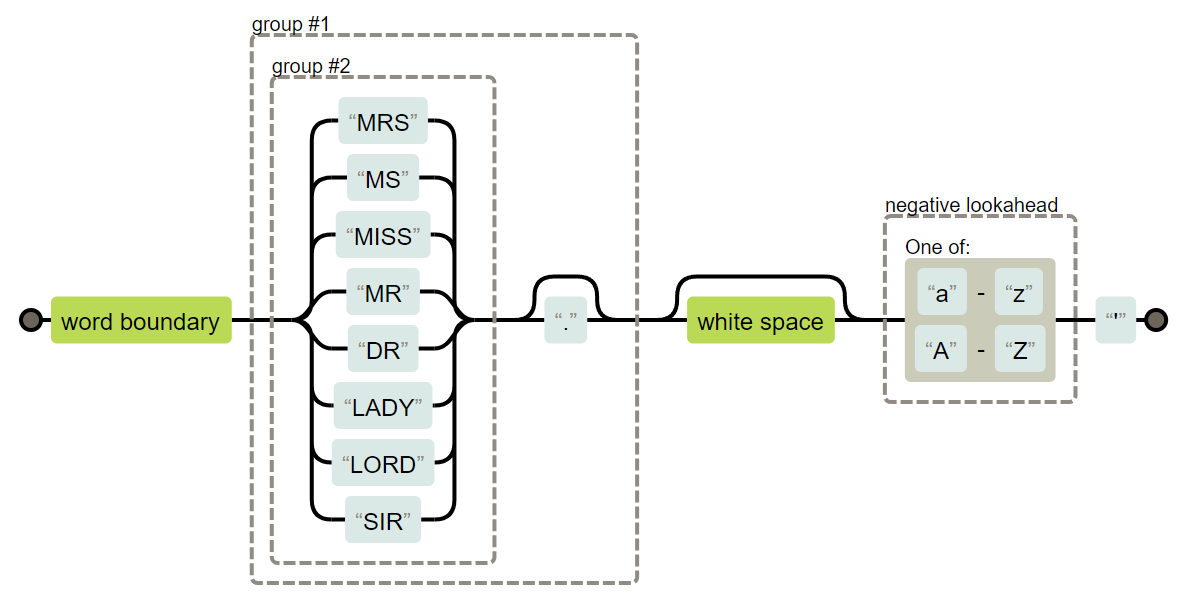

The function also considers organization names by defining a list of common organization suffixes and creating a regular expression pattern to match any of these suffixes in a given string.

<br>

The `organization_suffixes` list contains various common suffixes used in the names of organizations such as "Inc", "LLC", "Ltd", "Corp", "Co", "Corporation", "Limited" and others. Each element in the list represents a different suffix that might indicate an organizational entity.

<br>

Next, the `org_suffix_pattern` variable stores a regular expression pattern constructed using the organization suffixes list. The `join()` function is used to concatenate the suffixes into a single string, separated by the "|" (or) operator. This creates a pattern that matches any of the suffixes. Additionally, the `r'\b{}\b'` format string is used to ensure that the suffixes are matched as whole words (i.e., bounded by word boundaries). This prevents partial matches with words containing these suffixes as substrings. For example, "Corp" will match as a whole word but will not match "Corporation" or "Corporate" because they are not bounded by non-word characters at both ends.

<br>

The resulting `org_suffix_pattern` is later used in regular expression functions (e.g., `re.search()`) to identify organization names based on their suffixes. This helps in accurately distinguishing between individual and organizational names, as later seen in the `remove_title` function's methodology.

If the name of the party contains a title pattern ("MRS", "MS", "MISS", "MR", "DR", "LADY", "LORD" or "SIR"), indicating that it might be an individual, the function then checks for additional conditions to determine whether the title should actually be removed:
* If the legal entity text indicates that the party is an individual (e.g., contains "INDIVIDUAL"), the title is removed.
* If the legal entity text is "UNKNOWN" and the name does not contain common organization suffixes, the title is removed.
* If the legal entity text is empty (indicating ambiguity) and the name does not resemble an organization name, the title is removed.

<br>

Otherwise, if the name doesn't contain a title pattern or the conditions above are not met, the function returns the party's name as it is.

<br>

Upon processing, the function returns the modified name, where titles are removed if applicable, ensuring uniformity in the representation of party names. Overall, this streamlines the representation of party names by eliminating titles from individual names and considering common organization suffixes to maintain consistency and clarity in the extracted data.


In [23]:
def remove_title(name, legal_entity_text):
    # Define a regular expression pattern to match titles for individuals
    title_pattern = r'\b((MRS|MS|MISS|MR|DR|LADY|LORD|SIR)\.?)\s?(?![a-zA-Z])'

    # Define a list of common organization suffixes as a constant
    organization_suffixes = ['inc', 'llc', 'ltd', 'corp', 'co', 'corporation', 'limited', 'company', 'ing', 's\.?a\.?', 's\.?a\.s\.?', 's\.?a\.r\.l\.?', 's\.?a\.m\.?']
    org_suffix_pattern = '|'.join(r'\b{}\b'.format(suffix) for suffix in organization_suffixes)

    # Check if the name contains a title pattern anywhere
    if re.search(title_pattern, name, flags=re.IGNORECASE):
        # Check if legal_entity_text contains "INDIVIDUAL":
        if 'INDIVIDUAL' in legal_entity_text.upper():
            # Remove the title for individuals:
            return re.sub(title_pattern, '', name, flags=re.IGNORECASE).strip(', ')
        # Check if legal_entity_text contains "UNKNOWN":
        elif 'UNKNOWN' in legal_entity_text.upper() and not re.search(org_suffix_pattern, name, re.IGNORECASE):
            return re.sub(title_pattern, '', name, flags=re.IGNORECASE).strip(', ')
        # Check if legal_entity_text is empty:
        elif not legal_entity_text.strip() and not re.search(org_suffix_pattern, name, re.IGNORECASE):
            return re.sub(title_pattern, '', name, flags=re.IGNORECASE).strip(', ')
        else:
            return name.strip()

    # If the name doesn't contain a title pattern or the conditions above are not met, return it as it is
    return name.strip()


# Example 1: Individual with a title
name_1 = remove_title("Mr John Hammonds", "INDIVIDUAL")
print(name_1)  # Output: "John Hammonds"

# Example 2: Individual without a title
name_2 = remove_title("Smith, Ally, Ms", "INDIVIDUAL")
print(name_2)  # Output: "Smith, Ally"

# Example 3: Unknown entity without a title
name_3 = remove_title("Dr. James Smith", "UNKNOWN")
print(name_3)  # Output: "James Smith"

# Example 4: Unknown entity with a title that is an organization
name_4 = remove_title("Mr. ABC Inc.", "CORPORATION")
print(name_4)  # Output: "Mr. ABC Inc."

# Example 5: Empty legal_entity_text and a title
name_5 = remove_title("Dr. Peter Parker", "INDIVIDUAL")
print(name_5)  # Output: "Peter Parker"

# Example 5: Empty legal_entity_text and a title
name_5 = remove_title("Mruiz, Ahmed", "INDIVIDUAL")
print(name_5)  # Output: "Mruiz, Ahmed"

# Example 6: Individual with title "Lady"
name_6 = remove_title("Lady Elizabeth Smith", "INDIVIDUAL")
print(name_6)  # Output: "Elizabeth Smith"

# Example 7: Individual with title "Lord"
name_7 = remove_title("Lord John Watson", "INDIVIDUAL")
print(name_7)  # Output: "John Watson"

# Example 8: Individual with title "Lady"
name_6 = remove_title("Lady Elizabeth Smith", "LIMITED LIABILITY")
print(name_6)  # Output: "Lady Elizabeth Smith"

# Example 9: Individual with title "Lord"
name_7 = remove_title("Lord John Watson", "CORPORATION")
print(name_7)  # Output: "Lord John Watson"

# Example 10: Individual with title "Sir"
name_7 = remove_title("Sir John Watson", "INDIVIDUAL")
print(name_7)  # Output: "John Watson"



John Hammonds
Smith, Ally
James Smith
Mr. ABC Inc.
Peter Parker
Mruiz, Ahmed
Elizabeth Smith
John Watson
Lady Elizabeth Smith
Lord John Watson
John Watson


-------------------------------------

<div class="alert alert-block alert-info">
    
#### **4.2.2. States Definition** <a class="states" name="states"></a>

The provided assignment specification outlines certain rules for determining the country location of both assignors and assignees, based on the available information in the dataset (especially for the United States and United Kingdom). For instance, if the country name explicitly mentions "USA" or any variant of "USA," the country location is set to "USA." If the country name is a variant of the UK, such as "England," "Scotland," or "Wales," the country location is set to "UK." When explicit country names are not available, the state names or nationality provided in the data are used to infer the country location.

<br>

As mentioned previously, we identified earlier that the majority of `<state>` attributes appear to correspond to USA states, as well as some Canadian states and British overseas territories/Crown dependencies.

<br>

Hence, the code below defines lists of states for three different countries: the United States, the United Kingdom, and Canada. These lists act as reference data, facilitating the identification and standardization of state, country, and territory names essential for accurately determining the country identification of assignors and assignees later on.

In [24]:
# STATES FOR ASSIGNORS' AND ASSIGNEES' COUNTRY

us_states = ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']
uk_states = ['ENGLAND', 'SCOTLAND', 'WALES', 'NORTHERN IRELAND', 'ENGLAND AND WALES', 'GREAT BRITAIN']
canada_states = ['ALBERTA', 'BRITISH COLUMBIA', 'MANITOBA', 'NEW BRUNSWICK', 'NEWFOUNDLAND AND LABRADOR', 'NOVA SCOTIA', 'ONTARIO', 'PRINCE EDWARD ISLAND', 'QUEBEC', 'SASKATCHEWAN', 'NORTHWEST TERRITORIES', 'NUNAVUT', 'YUKON' ]


These patterns are used in the next step, particularly when parsing the text data and extracting information related to assignors and assignees.

-------------------------------------

<div class="alert alert-block alert-info">
    
### **4.3. Processing Trademark Assignment Data** <a class="process" name="process"></a>

<div class="alert alert-block alert-info">
    
#### **4.3.1. Extraction of Assignor & Assignee Information** <a class="assignors_assignees" name="assignors_assignees"></a>

Firstly, we create the functions `extract_assignors_info` and `extract_assignees_info`, which focus on parsing and standardizing assignor and assignee data extracted from the trademark assignment file. These functions are designed to process assignor and assignee information, including names, dates, and country identifiers.

<br>

Both the `extract_assignors_info` and `extract_assignees_info` functions take one input parameter each (explained in later sections): `assignors_match` and `assignees_match` respectively. The `assignors_match` parameter extracts information relevant to assignors, while `assignees_match` provides the content related to assignees.

<br>

The functions start off by initializing an empty list (`assignors_info` and `assignees_info`) to store assignor/assignee information. They then iterate over each section of assignor/assignee data provided in `assignors_match` or `assignees_match` respectively. Each section typically represents information about a single assignor/assignee extracted from the assignment entry. Using regular expressions, it extracts specific attributes such as assignor/assignee name, legal entity text, acknowledgement and execution dates (only for assignors), country name, state, and nationality from each section.



<div class="alert alert-block alert-info">
    
##### **Extracting Assignor/Assignee Attributes using Regular Expressions:** <a class="assignors/assignees attributes" name="latin"></a>

For each section, regular expressions (regex) are utilized to extract specific attributes related to the assignor/assignee:

* **Assignor/Assignee Name:** extracted using the regex `r'<person-or-organization-name>(.*?)</person-or-organization-name>'`, which captures the content within `<person-or-organization-name>` tags.
* **Legal Entity Text:** extracted using the regex `r'<legal-entity-text>(.*?)</legal-entity-text>'`, capturing the content within `<legal-entity-text>` tags.
* **Date Acknowledged:** extracted using the regex `r'<date-acknowledged>(\d{4})(\d{2})(\d{2})</date-acknowledged>'`. which captures the acknowledgement date in the format "YYYYMMDD". `(\d{4})` matches exactly four digits and captures them within parentheses, whereas `(\d{2})` matches exactly two digits. The captured components (year, month, day) are then formatted into a date string.
* **Execution Date:** extracted using the regex `r'<execution-date>(\d{4})(\d{2})(\d{2})</execution-date>'`, which captures the execution date in the format "YYYYMMDD".
* **Country Name:** extracted using the regex `r'<country-name>(.*?)</country-name>'`, capturing the content within `<country-name>` tags. The `re.IGNORECASE` flag is used to perform case-insensitive matching.
* **State:** extracted using the regex `r'<state>(.*?)</state>'`, capturing the content within `<state>` tags. Similar to the country name, the `re.IGNORECASE` flag is used.
* **Nationality:** extracted using the regex `r'<nationality>(.*?)</nationality>'`, capturing the content within `<nationality>` tags. Again, the `re.IGNORECASE` flag is applied.

<div style="display: flex; justify-content: center;">

**Representation of `r'(\d{4})(\d{2})(\d{2})'`:**


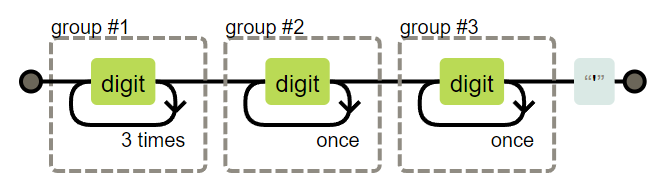

The next step is to perform extraction of assignor and assignee data, while accounting for handling missing attributes as well as any special characters.

<br>

For both assignor/assignee name and legal entity text, we use `assignor_name_match.group(1)` or `assignees_name_match.group(1)` and `legal_entity_text_match.group(1)` to extract the content retrieved by the first capturing group in the regex patterns used to search for the assignor/assignee name and legal entity text. For instance, the `.group(1)` method captures the content between `<person-or-organization-name>` and `</person-or-organization-name>` tags.


<div class="alert alert-block alert-info">

##### **Removal of Whitespaces and Special Characters:**

In addition to removing leading or trailing whitespaces from the extracted strings using `.strip()`, XML special characters such as `&amp;`, `&lt;`, `&gt;`, `&quot;`, and `&apos;` are replaced with their corresponding entities (i.e., &, <, >, ", and ', respectively) using the `.replace()` method. This replacement process is facilitated by a dictionary, `xml_entities`, which maps each character to its entity. Utilizing this dictionary ensures proper handling and prepares the strings for processing, enhancing code cleanliness and maintainability.

<div class="alert alert-block alert-info">

##### **Formatting of Dates:**


When formatting the acknowledgement and execution dates for assignors, we first extract the year, month, and day components respectively from the captured dates. We then use an f-string for string formatting, which combines the extracted year, month, and day components into a formatted date string separated by hyphens ('-').

<div class="alert alert-block alert-info">

##### **Handling Missing Attributes or Data:** <a class="missing" name="missing"></a>

Before storing the extracted attributes, checks are performed to identify if the corresponding match object exists. For example, we apply a conditional statement `if assignor_name_match else 'NA'` to check if the `assignor_name_match` object exists. If it does (i.e., a match for the assignor name is found), the extracted assignor name is returned. If not (i.e., no match is found and the match object is "None"), this indicates that the attribute element was not found in the assignor section and the string 'NA' is therefore returned as a default value.

<br>

This check for missing values is applied to all attributes, ensuring that if the corresponding XML tag (i.e. attribute element) is not found within the assignor/assignee section, the function returns 'NA' as a default value for that attribute.

<div class="alert alert-block alert-info">
    
##### **Country Inference Methodology:** <a class="assignors country" name="latin"></a>

After capturing the country name, state and nationality information through employing regular expressions, each extracted attribute is then processed to remove leading and trailing whitespaces, and is converted to uppercase for consistency.

<br>

To infer the country location for both assignors and assignees, we use a cascading logic based on the extracted attributes:

* If a country name is found (`country_name`), the code checks if it matches predefined strings indicating the USA, UK, or Canada. If a match is found, the corresponding country code is assigned to the `country` variable. Otherwise, the country is set based on the extracted `country_name` itself.
* If no country name is present but a state is extracted (`state`), the code checks if the state matches any US states, UK states, or Canadian provinces as defined in our three lists previously. If a match is found, the corresponding country code is assigned. Otherwise, the state itself is assigned to `country`.
* In the absence of both country name and state, but with nationality information available (`nationality`), the code performs similar checks based on nationality. If the nationality matches predefined patterns or states for the USA, UK, or Canada, the country code is set accordingly. If the nationality is missing or labeled as 'NOT PROVIDED' or 'STATELESS', the country is marked as 'NA'. Otherwise, the country is set based on the extracted nationality itself.

<br>

If none of the above conditions are met, indicating ambiguity or missing data, the country is set to 'NA' to signify the absence of a definitive country location.

<div class="alert alert-block alert-info">
    
##### **Organization and Storage of Assignor/Assignee Information:** <a class="assignors country" name="latin"></a>

After processing the data to extract relevant attributes for each assignor/assignee entry, these attributes are then organized into dictionaries and appended to the initialized empty lists (`assignors_info` and `assignees_info`) respectively.

<br>

Finally, the functions return the lists containing all the assignor/assignee information extracted from the inputs `assignors_match` and `assignees_match`.

In [25]:
def extract_assignors_info(assignors_match):
    assignors_info = []

    # Define a dictionary mapping XML characters to their corresponding entities
    xml_entities = {'&amp;': '&', '&lt;': '<', '&gt;': '>', '&quot;': '"', '&apos;': "'"}

    # Loop through each assignor section
    for assignor_section in assignors_match:
        # Regex for assignor sections
        assignor_name_match = re.search(r'<person-or-organization-name>(.*?)</person-or-organization-name>', assignor_section)
        legal_entity_text_match = re.search(r'<legal-entity-text>(.*?)</legal-entity-text>', assignor_section)
        date_acknowledged_match = re.search(r'<date-acknowledged>(\d{4})(\d{2})(\d{2})</date-acknowledged>', assignor_section)
        execution_date_match = re.search(r'<execution-date>(\d{4})(\d{2})(\d{2})</execution-date>', assignor_section)
        country_match = re.search(r'<country-name>(.*?)</country-name>', assignor_section, re.IGNORECASE)
        state_match = re.search(r'<state>(.*?)</state>', assignor_section, re.IGNORECASE)
        nationality_match = re.search(r'<nationality>(.*?)</nationality>', assignor_section, re.IGNORECASE)

        # Extract assignor name
        assignor_name = assignor_name_match.group(1).strip() if assignor_name_match else 'NA'
        # Extract date acknowledged
        date_acknowledged = f"{date_acknowledged_match.group(1)}-{date_acknowledged_match.group(2)}-{date_acknowledged_match.group(3)}" if date_acknowledged_match else 'NA'

        # Extract execution date
        execution_date = f"{execution_date_match.group(1)}-{execution_date_match.group(2)}-{execution_date_match.group(3)}" if execution_date_match else 'NA'

        # Extract legal entity text
        legal_entity_text = legal_entity_text_match.group(1).strip() if legal_entity_text_match else 'NA'

        # Replace XML characters with their entities
        for entity, char in xml_entities.items():
            assignor_name = assignor_name.replace(entity, char)
            legal_entity_text = legal_entity_text.replace(entity, char)

        # Extract nationality and determine country
        country_name = country_match.group(1).strip().upper() if country_match else None
        state = state_match.group(1).strip().upper() if state_match else None
        nationality = nationality_match.group(1).strip().upper() if nationality_match else None

        # Infer country based on nationality and/or state
        if country_name:
            if country_name == 'USA' or 'UNITED STATES' in country_name or country_name in us_states:
                country = 'USA'
            elif 'UK' in country_name or 'UNITED KINGDOM' in country_name or country_name in uk_states:
                country = 'UK'
            elif country_name in canada_states:
                country = 'CANADA'
            else:
                country = country_name
        elif state:
            if state in us_states:
                country = 'USA'
            elif state in uk_states:
                country = 'UK'
            elif state in canada_states:
                country = 'CANADA'
            else:
                country = state
        elif nationality:
            if nationality == 'USA' or 'UNITED STATES' in nationality or nationality in us_states:
                country = 'USA'
            elif 'UK' in nationality or 'UNITED KINGDOM' in nationality or nationality in uk_states:
                country = 'UK'
            elif nationality in canada_states:
                country = 'CANADA'
            elif nationality == 'NOT PROVIDED' or nationality == 'STATELESS':
                country = 'NA'
            else:
                country = nationality
        else:
            country = 'NA'

        # Append assignor information to the list
        assignors_info.append({
            'party-name': remove_title(assignor_name, legal_entity_text),
            'date-acknowledged': date_acknowledged,
            'execution-date': execution_date,
            'country': country,
            'legal-entity-text': legal_entity_text
        })

    return assignors_info


In [26]:
def extract_assignees_info(assignees_match):
    assignees_info = []

    # Define a dictionary mapping XML characters to their corresponding entities
    xml_entities = {'&amp;': '&', '&lt;': '<', '&gt;': '>', '&quot;': '"', '&apos;': "'"}

    # Loop through each assignee section
    for assignees_section in assignees_match:
        # Regex for assignee sections
        assignees_name_match = re.search(r'<person-or-organization-name>(.*?)</person-or-organization-name>', assignees_section)
        legal_entity_text_match = re.search(r'<legal-entity-text>(.*?)</legal-entity-text>', assignees_section)
        country_match = re.search(r'<country-name>(.*?)</country-name>', assignees_section, re.IGNORECASE)
        state_match = re.search(r'<state>(.*?)</state>', assignees_section, re.IGNORECASE)
        nationality_match = re.search(r'<nationality>(.*?)</nationality>', assignees_section, re.IGNORECASE)

        # Extract assignee name
        assignees_name = assignees_name_match.group(1).strip() if assignees_name_match else 'NA'

        # Extract legal entity text
        legal_entity_text = legal_entity_text_match.group(1).strip() if legal_entity_text_match else 'NA'

        # Replace XML characters with their entities
        for entity, char in xml_entities.items():
            assignees_name = assignees_name.replace(entity, char)
            legal_entity_text = legal_entity_text.replace(entity, char)

        # Extract nationality and determine country
        country_name = country_match.group(1).strip().upper() if country_match else None
        state = state_match.group(1).strip().upper() if state_match else None
        nationality = nationality_match.group(1).strip().upper() if nationality_match else None

        # Infer country based on country_name, state, and/or nationality
        if country_name:
            if country_name == 'USA' or 'UNITED STATES' in country_name or country_name in us_states:
                country = 'USA'
            elif 'UK' in country_name or 'UNITED KINGDOM' in country_name or country_name in uk_states:
                country = 'UK'
            elif country_name in canada_states:
                country = 'CANADA'
            else:
                country = country_name
        elif state:
            if state in us_states:
                country = 'USA'
            elif state in uk_states:
                country = 'UK'
            elif state in canada_states:
                country = 'CANADA'
            else:
                country = state
        elif nationality:
            if nationality == 'USA' or 'UNITED STATES' in nationality or nationality in us_states:
                country = 'USA'
            elif 'UK' in nationality or 'UNITED KINGDOM' in nationality or nationality in uk_states:
                country = 'UK'
            elif nationality in canada_states:
                country = 'CANADA'
            elif nationality == 'NOT PROVIDED' or nationality == 'STATELESS':
                country = 'NA'
            else:
                country = nationality
        else:
            country = 'NA'

        # Append assignee information to the list
        assignees_info.append({
            'party-name': remove_title(assignees_name, legal_entity_text),
            'country': country,
            'legal-entity-text': legal_entity_text
        })

    return assignees_info


-------------------------------------

<div class="alert alert-block alert-info">
    
#### **4.3.2. Extraction of Unique IDs & Remaining Assignment Entry Info** <a class="unique_id" name="unique_id"></a>

The function `extract_unique_id` is a crucial component in parsing trademark assignment data from the input file. Upon receiving the file path as input (using the `read_file_content` helper function specified earlier), it initializes an empty dictionary, `unique_ids`, to store unique identifiers and associated information extracted from the file. The function utilizes the `extract_assignment_entries` helper function to parse the content of the file, identifying individual assignment entries encapsulated within the `<assignment-entry>` tags. These entries serve as the basis for further processing, enabling the extraction of detailed information about each assignment record.

<br>

Iterating over each assignment entry with a for loop, the function employs various regular expressions to extract specific attributes such as reel number, frame number, last update date, conveyance text, correspondent information, assignors, assignees, and property details. For the attributes reel number, frame number, update date, conveyance text and correspondent, `re.search` is used to search for the text enclosed within the respective attribute tags for each current assignment entry. For instance, `re.search(r'<reel-no>(.*?)</reel-no>', entry)` searches for any text enclosed within the `<reel-no>` and `</reel-no>` tags before storing it in the `reel_no_match` variable. Meanwhile, for assignors, assignees, and properties, `re.findall` is used to find all occurrences of text enclosed within the respective attribute tags (e.g. `<assignor>` and `</assignor>` tags) for each current entry. The matched text is then stored in a variable (e.g. `assignors_match`) as a list.

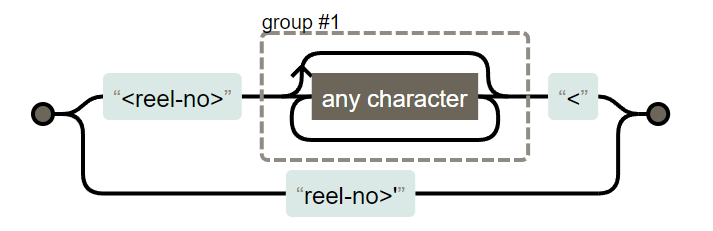

<br>

Upon successfully matching the required attributes within an assignment entry, the function formats and stores this information within the `unique_ids` dictionary. It verifies the presence of essential attributes like reel number and frame number using conditions such as `if reel_no_match` and `frame_no_match`. If these attributes are found, their respective values are extracted from the matched groups and stripped of any leading or trailing whitespace to ensure clean data. Similarly, the last update date attribute is extracted and formatted into a standard date format (YYYY-MM-DD) for uniformity. This is achieved by slicing the string obtained from the match using `update_date_str[:4]` for the year, `update_date_str[4:6]` for the month, and `update_date_str[6:]` for the day.

<br>

Furthermore, the function handles cases where certain attributes, such as conveyance text and correspondent information (more specifically, correspondent name), may contain special XML characters or be missing from the assignment entry. For instance, the function checks for the presence of `conveyance_text_match` and `correspondent_match` to determine if conveyance text and correspondent party information are available, respectively. If these matches are found, the corresponding values are extracted and stripped of any leading or trailing whitespace, with any XML character entities like `&amp;` replaced with their corresponding characters ('&') through utilization of an initialized dictionary (`xml_entities`) which maps each character to its entity, similar to what we did before with assignors and assignees. In cases where these attributes are absent, default values such as 'NA' are assigned to maintain consistency and completeness within the dataset.

<br>

After processing and formatting the main attributes, the function constructs a unique identifier (`unique_id`) for each assignment entry by concatenating the reel number and frame number obtained earlier, ensuring a distinct numerical ID for each trademark assignment entry. Subsequently, it creates a dictionary entry within the `unique_ids` dictionary using `unique_id` as the key and includes key-value pairs for each extracted attribute. These attributes are organized in a structured format, facilitating easy retrieval and analysis of assignment information based on the unique identifier.

<br>

The function then proceeds to extract additional information regarding assignors and assignees using the `extract_assignors_info` and `extract_assignees_info` helper functions  respectively. Once the assignor and assignee information is extracted and organized, it is associated with the corresponding unique identifier within the `unique_ids` dictionary. Lastly, the function calculates the count of properties associated with each assignment entry by determining the length of the `properties_match` list. This count is converted to a string and stored in the `unique_ids` dictionary under the key `property-count`.

<br>

Once all assignment entries are processed, this dictionary is returned, containing key attributes organized into a structured format.

In [27]:
def extract_unique_id(file_path):
    unique_ids = {}

    # Define a dictionary mapping XML characters to their corresponding entities
    xml_entities = {'&amp;': '&', '&lt;': '<', '&gt;': '>', '&quot;': '"', '&apos;': "'"}

    # Read content from file
    content = read_file_content(file_path)

    # Extract assignment entries from the content
    assignment_entries = extract_assignment_entries(content)

    # Loop through each assignment entry
    for entry in assignment_entries:
        reel_no_match = re.search(r'<reel-no>(.*?)</reel-no>', entry)
        frame_no_match = re.search(r'<frame-no>(.*?)</frame-no>', entry)
        update_date_match = re.search(r'<last-update-date>(.*?)</last-update-date>', entry)
        conveyance_text_match = re.search(r'<conveyance-text>(.*?)</conveyance-text>', entry)
        correspondent_match = re.search(r'<correspondent>.*?<person-or-organization-name>(.*?)</person-or-organization-name>', entry, re.DOTALL)
        assignors_match = re.findall(r'<assignor>(.*?)</assignor>', entry, re.DOTALL)
        assignees_match = re.findall(r'<assignee>(.*?)</assignee>', entry, re.DOTALL)
        properties_match = re.findall(r'<property>(.*?)</property>', entry, re.DOTALL)

        # Extract reel number and frame number
        if reel_no_match and frame_no_match:
            reel_no = reel_no_match.group(1).strip()
            frame_no = frame_no_match.group(1).strip()
            update_date_str = update_date_match.group(1).strip()

            # Format update date
            if update_date_str:
                update_date = f"{update_date_str[:4]}-{update_date_str[4:6]}-{update_date_str[6:]}"
            else:
                update_date = 'NA'

            # Extract conveyance text
            if conveyance_text_match:
                conveyance_text = conveyance_text_match.group(1).strip()
            else:
                conveyance_text = 'NA'

            # Extract correspondent party
            if correspondent_match:
                correspondent_party = correspondent_match.group(1).strip()
            else:
                correspondent_party = 'NA'

            # Replace XML characters with their entities
            for entity, char in xml_entities.items():
                conveyance_text = conveyance_text.replace(entity, char)
                correspondent_party = correspondent_party.replace(entity, char)

            # Generate unique ID
            unique_id = f"{reel_no}{frame_no}"

            # Store information in the unique_ids dictionary
            unique_ids[unique_id] = {
                'last-update-date': update_date,
                'conveyance-text': conveyance_text,
                'correspondent-party': correspondent_party
            }

             # Extract and store assignors and assignees information
            assignors_info = extract_assignors_info(assignors_match)
            assignees_info = extract_assignees_info(assignees_match)

            unique_ids[unique_id]['assignors-info'] = assignors_info
            unique_ids[unique_id]['assignees-info'] = assignees_info

            # Count properties
            unique_ids[unique_id]['property-count'] = str(len(properties_match))

    return unique_ids


# Call the function and store the result
file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/Students data/Task 1/Group055.txt'
result = extract_unique_id(file_path)

# Initialize a counter to track the number of printed elements
printed_count = 0

# Print the first five elements
for key, value in result.items():
    print(key, value)
    printed_count += 1
    if printed_count == 5:
        break


31680109 {'last-update-date': '2005-10-03', 'conveyance-text': 'ASSIGNS THE ENTIRE INTEREST', 'correspondent-party': 'ROBERT W. HOKE', 'assignors-info': [{'party-name': 'GLENMAC INC.', 'date-acknowledged': 'NA', 'execution-date': '2005-09-30', 'country': 'USA', 'legal-entity-text': 'CORPORATION'}], 'assignees-info': [{'party-name': 'HARLEY ATTACHMENTS, LLC', 'country': 'USA', 'legal-entity-text': 'LIMITED LIABILITY COMPANY'}], 'property-count': '3'}
63180610 {'last-update-date': '2018-05-03', 'conveyance-text': 'CHANGE OF NAME', 'correspondent-party': 'HARTING STIFTUNG & CO. KG', 'assignors-info': [{'party-name': 'HARTING AG & CO. KG', 'date-acknowledged': 'NA', 'execution-date': '2018-03-12', 'country': 'NA', 'legal-entity-text': 'UNKNOWN'}], 'assignees-info': [{'party-name': 'HARTING STIFTUNG & CO. KG', 'country': 'GERMANY', 'legal-entity-text': 'UNKNOWN'}], 'property-count': '1'}
65710069 {'last-update-date': '2019-02-25', 'conveyance-text': 'CHANGE OF NAME', 'correspondent-party': 

-------------------------------------

<div class="alert alert-block alert-info">
    
#### **4.3.3. Application to Input File** <a class="anchor" name="apply"></a>

The next step involves applying the `extract_unique_id` function to a specific file. By invoking the `extract_unique_id` function with the file path specified for our group, this initiates the process of parsing and organizing the trademark assignment entry data contained within the file.

<br>

This step is essential for transforming the raw assignment data into a structured format. Upon completion, the `unique_ids` variable holds the extracted information, structured into a dictionary format containing unique identifiers and associated assignment details.


In [28]:

file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/Students data/Task 1/Group055.txt'
unique_ids = extract_unique_id(file_path)


-------------------------------------

<div class="alert alert-block alert-warning">

## **5. Writing to JSON File** <a class="anchor" name="write"></a>

</div>

<div class="alert alert-block alert-info">
    
### **5.1. Saving Extracted Data to JSON File** <a class="anchor" name="save"></a>

After extracting and organizing the trademark assignment data into a structured dictionary format, the final step involves saving the data to a JSON file.

<br>

The `save_to_json` function facilitates this process by taking a single parameter: the data to be saved. In this case, the `unique_ids` dictionary containing the extracted assignment information is passed as the data parameter.

<br>

The function opens the specified file path in write mode ('w') with UTF-8 encoding to ensure compatibility with various character sets. It then uses the `json.dump` method to write the structured data (`unique_ids`) into the opened file. The `indent` parameter is set to 4 to format the JSON file with indentation for improved readability. Additionally, `ensure_ascii` is set to False to allow non-ASCII characters (such as SOCIÉTÉ) to be properly encoded in the JSON file.

<br>

Once the data is successfully written to the JSON file, the `files.download()` function from the `google.colab` library is invoked to download the file.

In [29]:
from google.colab import files

def save_to_json(data):
    file_path = 'task1_055.json'
    with open(file_path, 'w', encoding='utf-8') as output_file:
        json.dump(data, output_file, indent=4, ensure_ascii=False)

    files.download(file_path)

save_to_json(unique_ids)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-------------------------------------

<div class="alert alert-block alert-info">
    
### **5.2. Verification of the Generated JSON File** <a class="anchor" name="test_xml"></a>

In the verification process of the generated JSON file, we employed two widely used text editors, Notepad++ and VS Code, to compare the content of the input file with that of the output JSON file. This visual inspection allowed us to ensure that the data extraction and conversion to JSON format were performed accurately.

<br>

Furthermore, to quantitatively validate the integrity of the extracted data, we implemented a `count_assignment_entries` function (shown in [8.1. Counting Extracted Assignment Entries](#count)) to count the number of assignment entries in both the original input file and the generated JSON file. The comparison revealed that the number of assignment entries remained consistent before and after extraction, with a total count of 6011 entries, indicating successful data extraction and preservation.

<br>

In addition, we conducted further verification by extracting and examining the unique countries associated with both assignors and assignees [as seen in [8.2. Extracting Unique Countries (Assignors)](#assignor_countries) and [8.3. Extracting Unique Countries (Assignors)](#assignee_countries)]. This step was crucial in ensuring the accurate identification of countries for each party involved in the trademark assignment entries.

<br>

For assignors, we utilized an `extract_unique_assignor_countries` function to extract the unique countries from the assignors' information contained within the extracted data. Similarly, for assignees, a separate `extract_unique_assignee_countries` function was employed to extract the unique countries associated with the assignees. The absence of states corresponding to the United States (US), United Kingdom (UK), and Canada in the extracted countries reaffirmed the accuracy of the country identification process.

-------------------------------------

<div class="alert alert-block alert-warning">

## **6. Summary** <a class="anchor" name="summary"></a>

</div>

In conclusion, effective preparation of trademark assignment data relies on thorough loading and parsing of files, along with standardizing party names and country identifiers.

<br>

1. Starting with the basic steps, we access and structure the raw data using functions like `read_file_content()` and `extract_assignment_entries()`.
2. Next, we focus on standardizing party names and identifying country locations using regular expressions and predefined lists of states.
3. With the data organized, we then process trademark assignment entries using functions such as `extract_assignors_info()` and `extract_assignees_info()` (for extracting information related to assignor and assignee) as well as `extract_unique_id` to parse and standardize data.

Applying these functions to the input file is essential, as it transforms raw data into a structured format, ready for analysis.

<br>

4. Finally, the extracted data is saved to a JSON file using the `save_to_json()` function, ensuring its preservation and accessibility for future reference.


In essence, through thorough loading, parsing, processing, and storage, trademark assignment data is transformed into a structured and accessible JSON format.

-------------------------------------

<div class="alert alert-block alert-warning">

## **7. References** <a class="anchor" name="Ref"></a>

</div>

[1]<a class="anchor" name="ref-1"></a> Python regular expressions - re.search() vs re.findall(), https://stackoverflow.com/questions/9000960/python-regular-expressions-re-search-vs-re-findall, Accessed 22/03/2024.

<br>


[2]<a class="anchor" name="ref-2"></a> Python Regex Sub - Use Match as Dict Key in Substitution, https://stackoverflow.com/questions/22545114/python-regex-sub-use-match-as-dict-key-in-substitution, Accessed 27/03/2024.


<br>

[3]<a class="anchor" name="ref-3"></a> How do I write JSON data to a file? https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file, Accessed 09/04/2024.

<br>

[4]<a class="anchor" name="ref-4"></a> What characters do I need to escape in XML documents? https://stackoverflow.com/questions/1091945/what-characters-do-i-need-to-escape-in-xml-documents, Accessed 11/04/2024.


## --------------------------------------------------------------------------------------------------------------------------

<div class="alert alert-block alert-warning">

## **8. Appendix** <a class="anchor" name="appendix"></a>

</div>

<div class="alert alert-block alert-info">
    
### **8.1. Counting Extracted Assignment Entries** <a class="anchor" name="count"></a>

In [30]:
def count_assignment_entries(file_path):
    with open(file_path, 'r') as file:
        # Read the content of the file
        content = file.read()

        # Use regex to find all assignment entries
        assignment_entries = re.findall(r'<assignment-entry>', content)

        # Count the number of assignment entries
        count = len(assignment_entries)

    return count

# Example usage:
original_file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/Students data/Task 1/Group055.txt'

# Count the number of assignment entries before extraction
before_extraction_count = count_assignment_entries(original_file_path)
print("Number of assignment entries before extraction:", before_extraction_count)

# Extract the unique IDs
unique_ids = extract_unique_id(original_file_path)

# Count the number of unique IDs after extraction
after_extraction_count = len(unique_ids)
print("Number of unique IDs after extraction:", after_extraction_count)


Number of assignment entries before extraction: 6011
Number of unique IDs after extraction: 6011


<div class="alert alert-block alert-info">
    
### **8.2. Extracting Unique Countries (Assignors)** <a class="anchor" name="assignor_countries"></a>

In [31]:
def extract_unique_assignor_countries(unique_ids):
    unique_countries = set()

    for unique_id, data in unique_ids.items():
        assignors_info = data.get('assignors-info', [])

        for assignor in assignors_info:
            country = assignor.get('country')
            if country:
                unique_countries.add(country)

    return unique_countries

# Assuming unique_ids is already populated
unique_countries = extract_unique_assignor_countries(unique_ids)

print("Unique Assignor Countries:")
for country in unique_countries:
    print(country)


Unique Assignor Countries:
PUERTO RICO
POLAND
RUSSIAN FEDERATION
AUSTRIA
MEXICO
GABON
PHILIPPINES
LIECHTENSTEIN
INDIA
JERSEY
JAPAN
BULGARIA
FRANCE
SINGAPORE
DENMARK
HONDURAS
ISRAEL
NA
GERMANY
VENEZUELA
IRELAND
TURKEY
VIRGIN ISLANDS, BRITISH
NEW ZEALAND
MONACO
CAYMAN ISLANDS
KOREA, REPUBLIC OF
LUXEMBOURG
BELGIUM
SWITZERLAND
CANADA
CHILE
JORDAN
HUNGARY
CYPRUS
THAILAND
BAHAMAS
ROMANIA
COSTA RICA
SPAIN
UK
PANAMA
ITALY
NETHERLANDS
USA
MALTA
ANTIGUA AND BARBUDA
SOUTH AFRICA
TURKS AND CAICOS ISLANDS
FINLAND
NETHERLANDS ANTILLES
AUSTRALIA
CHINA
SWEDEN
BRAZIL
TRINIDAD AND TOBAGO
BARBADOS
NORWAY
UNITED ARAB EMIRATES


<div class="alert alert-block alert-info">
    
### **8.3. Extracting Unique Countries (Assignees)** <a class="anchor" name="assignee_countries"></a>

In [32]:
def extract_unique_assignee_countries(unique_ids):
    unique_countries = set()

    for unique_id, data in unique_ids.items():
        assignees_info = data.get('assignees-info', [])

        for assignee in assignees_info:
            country = assignee.get('country')
            if country:
                unique_countries.add(country)

    return unique_countries

# Assuming unique_ids is already populated
unique_countries = extract_unique_assignee_countries(unique_ids)

print("Unique Assignee Countries:")
for country in unique_countries:
    print(country)


Unique Assignee Countries:
PUERTO RICO
POLAND
RUSSIAN FEDERATION
AUSTRIA
MEXICO
ALBANIA
LIECHTENSTEIN
INDIA
JAPAN
BULGARIA
FRANCE
SINGAPORE
DENMARK
URUGUAY
MALAYSIA
ISRAEL
GERMANY
NA
IRELAND
TURKEY
VIRGIN ISLANDS, BRITISH
NEW ZEALAND
BELIZE
CAYMAN ISLANDS
GREECE
KOREA, REPUBLIC OF
CROATIA
LUXEMBOURG
BELGIUM
CZECH REPUBLIC
SWITZERLAND
CANADA
CHILE
JORDAN
HUNGARY
CYPRUS
BERMUDA
THAILAND
DOMINICA
BAHAMAS
PORTUGAL
ROMANIA
SPAIN
UK
CHANNEL ISLANDS
ITALY
PANAMA
NETHERLANDS
USA
MALTA
SERBIA
SOUTH AFRICA
ANTIGUA AND BARBUDA
ESTONIA
ARGENTINA
FINLAND
NETHERLANDS ANTILLES
AUSTRALIA
CHINA
BRAZIL
SWEDEN
BARBADOS
BELARUS
GIBRALTAR
NORWAY
UNITED ARAB EMIRATES
GUATEMALA


## --------------------------------------------------------------------------------------------------------------------------

[My Workspace](https://colab.research.google.com/drive/15HZJdgqO7EETbS7c69833Cm4xRBJOP4T?usp=sharing)